<a href="https://colab.research.google.com/github/DomingosN/Ciencia-da-dados-aplicada-as-Organiza-es-/blob/master/EDA_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise Exploratório de Dados com Python o Dataset Iris

Este notebook é inspeado livrenete em diversos nottebooks que você pode encontrar em sites como Kaggle ou Github. Mas serev como uma boa referencia para entender como realizar uma Exploratory Data Analisys - EDA (Análise Exploratória de dados)

In [0]:
# importando pandas, e outros modulos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [6]:
dir = os.getcwd() 
# Carregando odataset do um diretório do notebook
iris = pd.read_csv('Iris.csv') # Agora o dataset iris é um Pandas DataFrame

# uma primeir olhada nos dados
iris.head(10)#O método head(n) permite que você veja o começo de um dataframe, o parêtro n define o núemro de linhas serem exibidas

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
# confirmando o número de amostras e de cada espécie
print (iris['Species'].count())
print (iris['Species'].value_counts())

150
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64


In [8]:
# Vamos ver as colunas do dataset
iris.columns.tolist()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

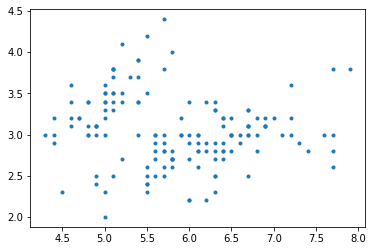

In [9]:
# criando um scatter plot de atributos com o Matplotib 
plt.plot(iris['SepalLengthCm'],iris["SepalWidthCm"],marker='.',linestyle='none')
plt.show()

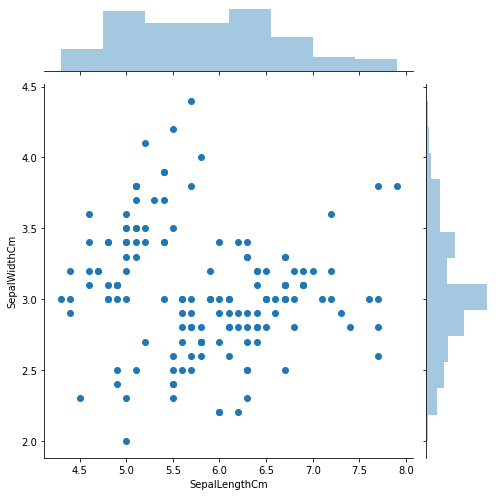

In [10]:
# Usando seaborn para criar algo similar
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=7)

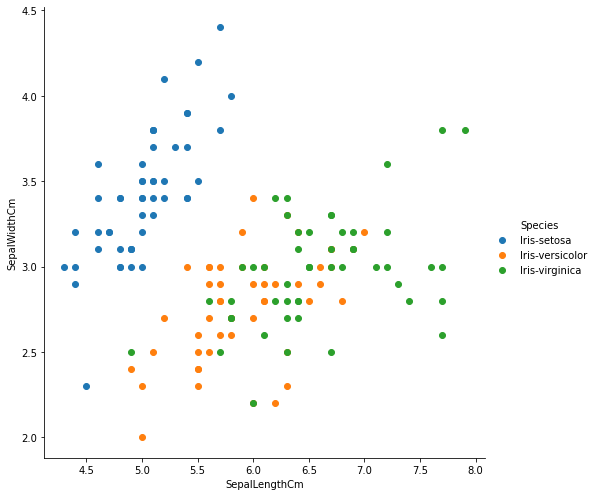

In [11]:
# usando FacetGrid do Seaborn para criar uma scatterplot colorida conforme o atributo species
sns.FacetGrid(iris, hue="Species", size=7) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

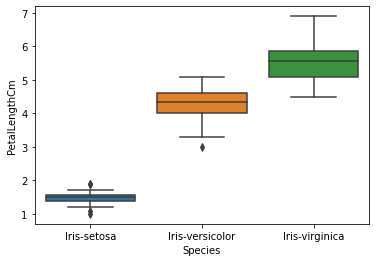

In [12]:
# Um boxplot de atributos  com o seaborn é bem útil para comparar atributos em grupos de interesse
sns.boxplot(x="Species", y="PetalLengthCm", data=iris);

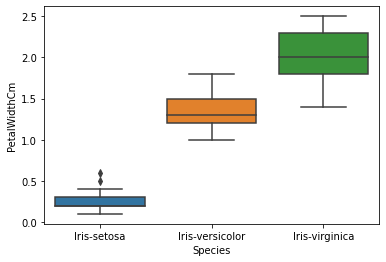

In [13]:
sns.boxplot(x="Species", y="PetalWidthCm", data=iris)

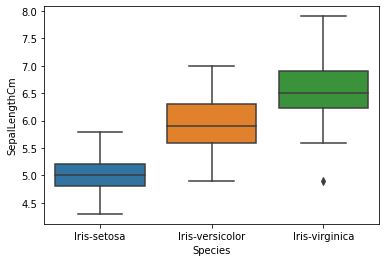

In [14]:
sns.boxplot(x="Species", y="SepalLengthCm", data=iris)

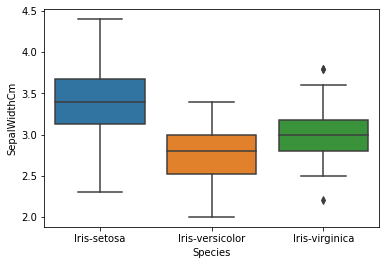

In [15]:
sns.boxplot(x="Species", y="SepalWidthCm", data=iris)

* desde o início, podemos ver que, usando o recurso de comprimento e largura de pétalas, podemos facilmente identificar setosa das outras espécies. *

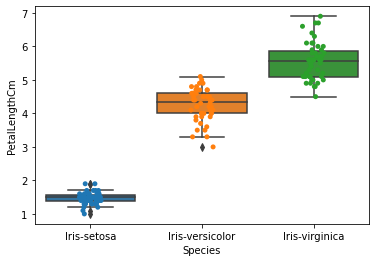

In [16]:
# usando a função striplot do Seaborn adiciona uma camada de pontos individuais
# setting jitter = True garante que nem todos os pontos caiam na mesma linha
# Salvar os eixos resultantes como eixo sempre faz com que o gráfico resultante seja mostrado
# em cima dos eixos anteriores (isso é uma coisa interessante de aprender :)
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

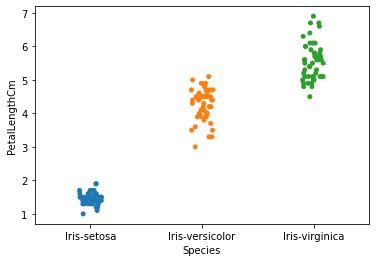

In [17]:

#ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

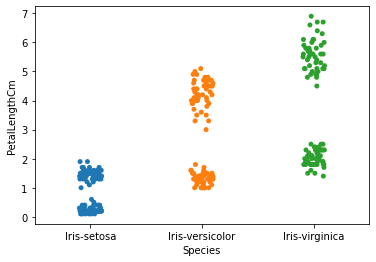

In [18]:

ax = sns.stripplot(x="Species", y="PetalWidthCm", data=iris, jitter=True, edgecolor="gray")
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

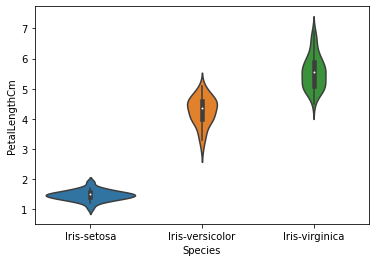

In [19]:
# Um gráfico de violino combina os benefícios dos dois gráficos anteriores e os simplifica. 
# As regiões mais densas dos dados são mais gordas e mais esparsas em um gráfico de violino

sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

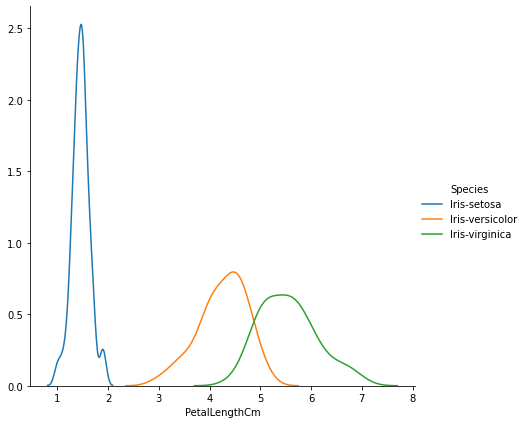

In [20]:
# Uma plotagem marítima final útil para examinar relações univariadas é o kdeplot,
# que cria e visualiza uma estimativa de densidade de kernel do atributo subjacente
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

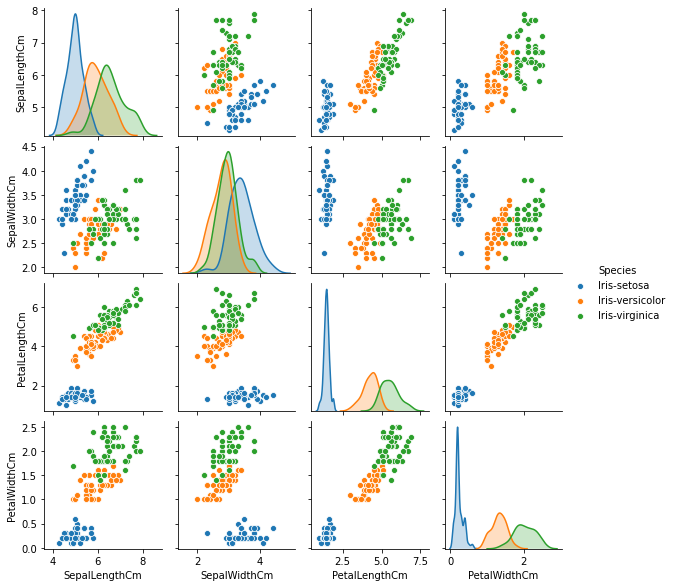

In [21]:
# Outro gráfico do seaborn útil é o gráfico de pares (Pairplot), que mostra a relação bivariada
# entre cada par de recursos
#
# No pariplot, veremos que a espécie Iris-setosa está separada das outras
# dois em todas as combinações de recursos

sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=2)

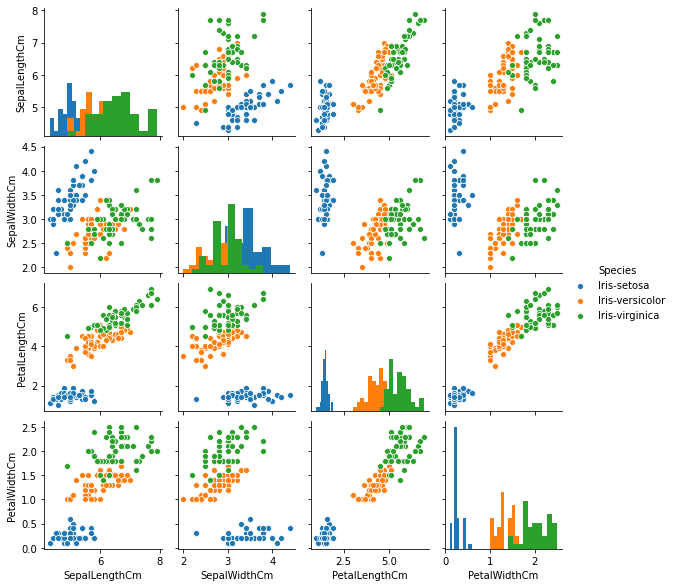

In [22]:
# Os elementos diagonais em um parplot mostram um kde por padrão
# Podemos atualizar esses elementos para mostrar outras coisas, como um histograma

sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=2, diag_kind="hist")

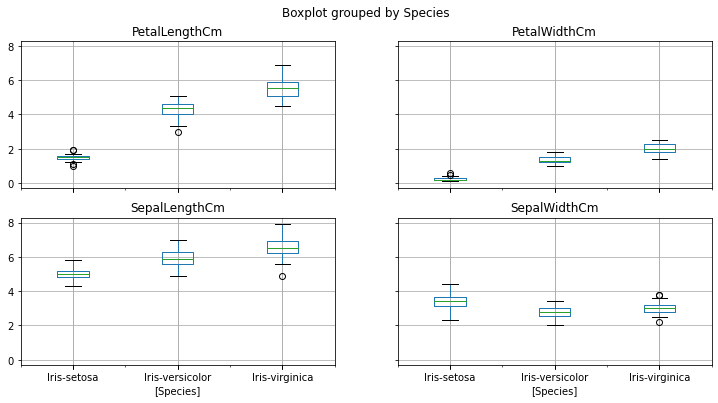

In [23]:
# Agora que cobrimos o Seaborn, vamos voltar para alguns dos que podemos fazer com os pandas
# Podemos rapidamente fazer um boxplot com Pandas em cada recurso dividido por espécie
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6));

In [0]:
# importar o módulo para separar o conjunto de dados em conjuntos de teste e treinamento.
from sklearn.model_selection import train_test_split

In [0]:
# Divida o conjunto de dados da íris em um trem e teste
X_train, X_test, y_train, y_test=train_test_split(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],
                                                 iris['Species'],random_state=0,train_size=0.75)

In [27]:
# explorando o resultado
print(X_train.head())
print(y_train.head())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
61             5.9           3.0            4.2           1.5
92             5.8           2.6            4.0           1.2
112            6.8           3.0            5.5           2.1
2              4.7           3.2            1.3           0.2
141            6.9           3.1            5.1           2.3
61     Iris-versicolor
92     Iris-versicolor
112     Iris-virginica
2          Iris-setosa
141     Iris-virginica
Name: Species, dtype: object


## Importando o Modelo que queremos utilizar

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
# Vamos criar uma instância do modelo com os parâmetros que queremos utilizar
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [30]:
# Agora vamos TREINAR o modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [31]:
# vamos agora testar o modelo
clf.predict(X_test)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [32]:
#O Método score define a acurácia do modelo
score = clf.score(X_test, y_test)
print(score)

0.8947368421052632


In [0]:
from sklearn import tree

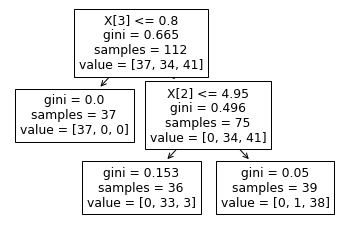

In [34]:
tree.plot_tree(clf);

## Vamos agora avaliar a complexidade do modelo

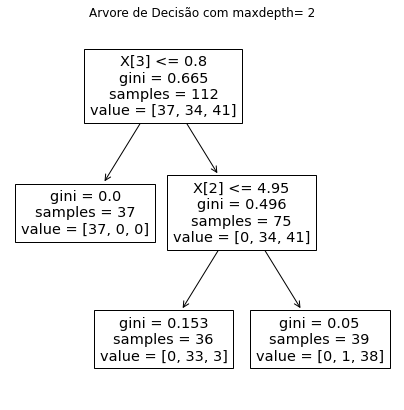

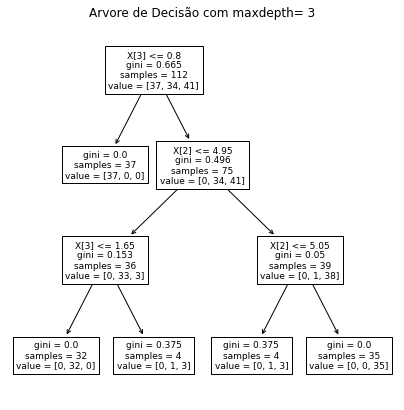

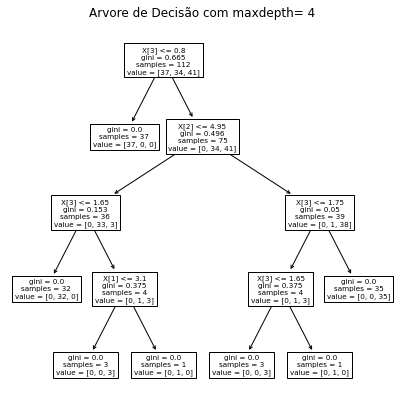

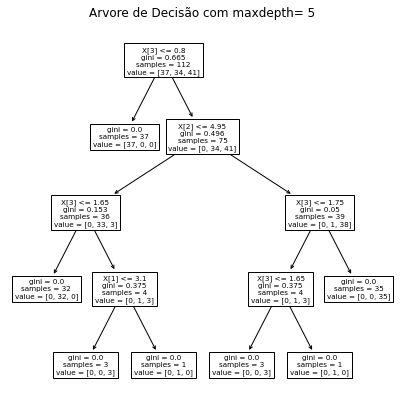

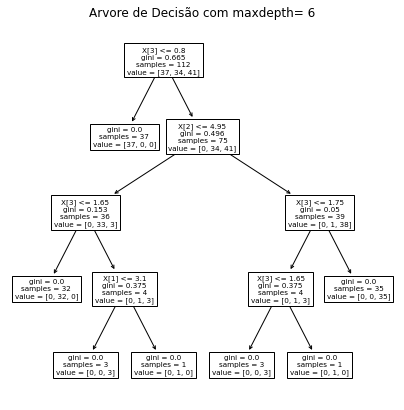

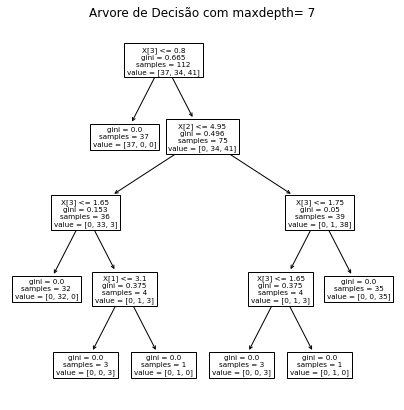

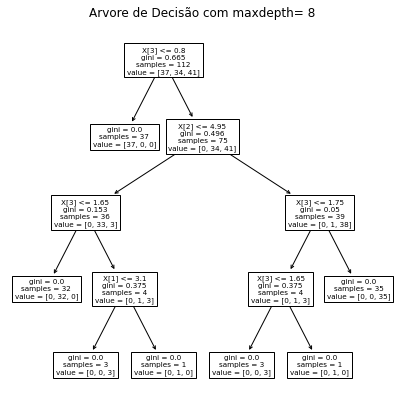

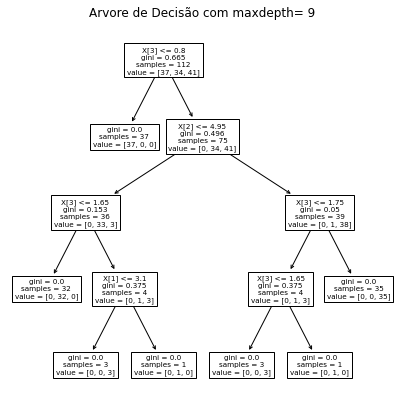

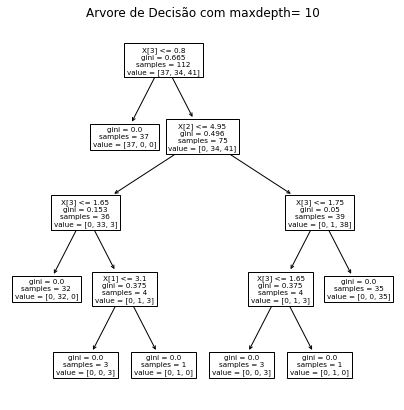

In [40]:
# Vamos criar uma instância do modelo com os parâmetros que queremos utilizar
mds = [2,3,4,5,6,7,8,9,10]
scores = []
for md in mds:
    clf = DecisionTreeClassifier(max_depth = md, 
                                 random_state = 0)
    # Agora vamos TREINAR o modelo
    clf.fit(X_train, y_train)
    # vamos agora testar o modelo
    clf.predict(X_test)
    #O Método score define a acurácia do modelo
    score = clf.score(X_test, y_test)
    scores.append(score)
    #print(score)
    plt.figure(figsize=(7,7))
    tree.plot_tree(clf);
    plt.title('Arvore de Decisão com maxdepth= '+str(md))

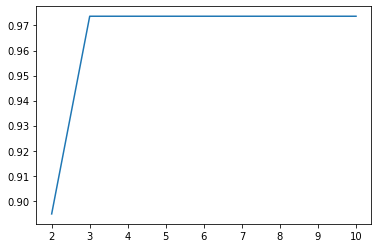

In [42]:
plt.plot(mds,scores)